# Lost Pets Dataset

I found a "Lost Pets" dataset (csv file) on [data.org](http://www.data.gov).

Lets take a look at it! First we will print all the headers from the file.


In [63]:
import csv
import matplotlib.pyplot as plt
from collections import defaultdict, Counter

with open('./Lost__found__adoptable_pets.csv', 'r') as csv_file:
    reader = csv.reader(csv_file, delimiter=",", quotechar='"')
    headers = next(reader)
    print(headers)

['impound_no', 'Animal_ID', 'Data_Source', 'Record_Type', 'Link', 'Current_Location', 'Animal_Name', 'animal_type', 'Age', 'Animal_Gender', 'Animal_Breed', 'Animal_Color', 'Date', 'Date_Type', 'Obfuscated_Address', 'City', 'State', 'Zip', 'jurisdiction', 'obfuscated_latitude', 'obfuscated_longitude', 'Image', 'image_alt_text', 'location_for_map', 'Memo']


So there's some interesting stuff we could extract from here. We will start by creating a dictionary csv reader that will allow us to access each individual column of the data set easily.

In [64]:
csv_file = open('./Lost__found__adoptable_pets.csv', 'r')
reader = csv.DictReader(csv_file)    

# Data Exploration

Lets start by graphing some stuff in order to find patterns. 

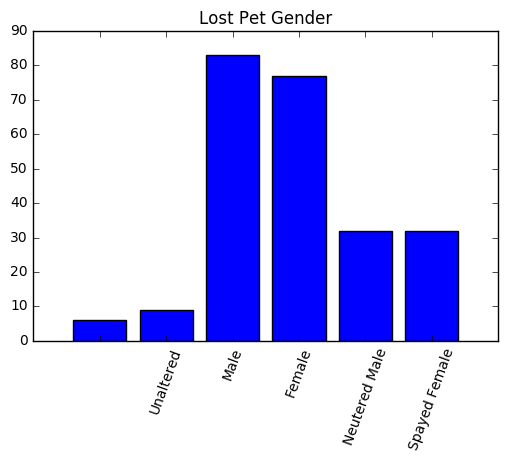

In [65]:
# Count lost/abond
counts = defaultdict(int)
for row in reader:
    counts[row['Animal_Gender']] += 1
gender_list = list(counts.keys())
gender_count = list(counts.values())
    
x = range(len(gender_list))
y = gender_count
plt.title('Lost Pet Gender')
plt.bar(x, y , color='blue', align='center')
plt.xticks(x, gender_list, rotation=70)
plt.show()

It appears that neutered pets are less likely to get "lost" than unneutered pets.

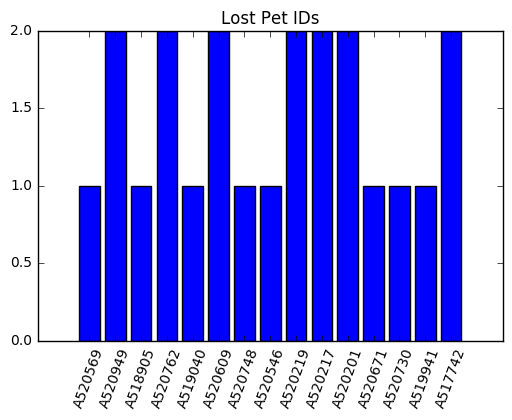

In [66]:
csv_file.seek(0)
counts = defaultdict(int)
next(reader)
for row in reader:
    counts[row['Animal_ID']] += 1
counts = dict(Counter(counts).most_common(15))
ID_list = list(counts.keys())
ID_count = list(counts.values())

x = range(len(ID_list))
y = ID_count
plt.bar(x, y , color='blue', align='center')
plt.title('Lost Pet IDs')
plt.xticks(x, ID_list, rotation=70)
plt.show()

It appears that no unique pet was lost more than twice! That's not too bad...

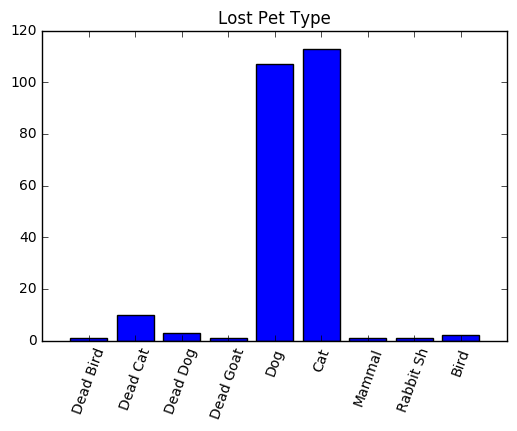

In [67]:
csv_file.seek(0)
counts = defaultdict(int)
next(reader)
for row in reader:
    counts[row['animal_type']] += 1
#counts = dict(Counter(counts).most_common(15))
ID_list = list(counts.keys())
ID_count = list(counts.values())

x = range(len(ID_list))
y = ID_count
plt.bar(x, y , color='blue', align='center')
plt.title('Lost Pet Type')
plt.xticks(x, ID_list, rotation=70)
plt.show()

People lose their cats more than their dogs which makes sense. I don't know why they are tracking dead animals as lost...

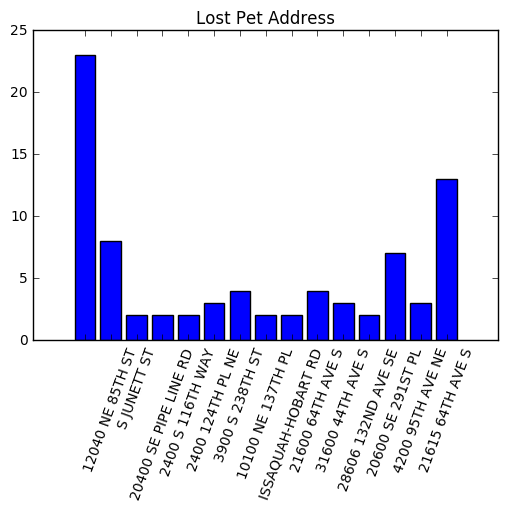

In [68]:
csv_file.seek(0)
counts = defaultdict(int)
next(reader)
for row in reader:
    counts[row['Obfuscated_Address']] += 1
counts = dict(Counter(counts).most_common(15))
ID_list = list(counts.keys())
ID_count = list(counts.values())

x = range(len(ID_list))
y = ID_count
plt.bar(x, y , color='blue', align='center')
plt.title('Lost Pet Address')
plt.xticks(x, ID_list, rotation=70)
plt.show()

Most animals that got lost did not have an address. There were a handful of addresses that had 4+ pet losses. Perhaps they are irresponsible owners.

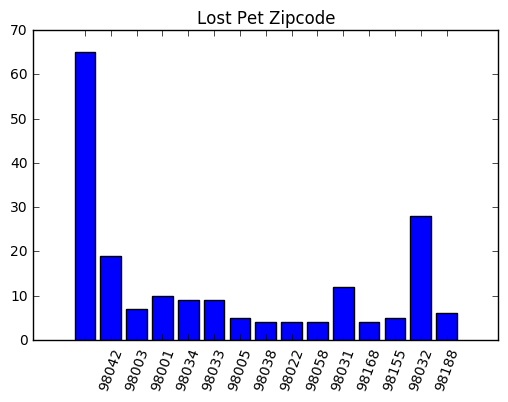

In [69]:
csv_file.seek(0)
counts = defaultdict(int)
next(reader)
for row in reader:
    counts[row['Zip']] += 1
counts = dict(Counter(counts).most_common(15))
ID_list = list(counts.keys())
ID_count = list(counts.values())

x = range(len(ID_list))
y = ID_count
plt.bar(x, y , color='blue', align='center')
plt.title('Lost Pet Zipcode')
plt.xticks(x, ID_list, rotation=70)
plt.show()

Again, the majority of lost pets did not have a zip code entered for them. 98032 and 98042 seem to have a lot of lost pets though. That would be Kent, WA and Covington, WA, respectively.

Turns out these areas are right next to each other.

In [70]:
csv_file.close()